<a href="https://colab.research.google.com/github/parkhy0106/HolyMoly/blob/master/Exploratory%20Data%20Analysis%20Examples/Exploratory_data_Analysis_for_Tabular_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Font download, Drive

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 32 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (7,709 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [ ]:
import os
os.kill(os.getpid(), 9)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#EDA

##Importing the required libraries for EDA

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
import copy
import tqdm
from datetime import datetime

%matplotlib inline     
sns.set(color_codes=True)

In [ ]:
plt.rc('font', family='NanumBarunGothic')

폰트 나눔고딕 사용(없으면...어뜩하냐)

## Loading the data into the data frame.

In [ ]:
directory = '/content/drive/MyDrive/tomato/'  # directory where you have downloaded the data CSV files from the competition
output_directory = '/content/drive/MyDrive/tomato/' 
index = 'Sample_no'

In [ ]:
train_input = pd.read_csv(directory+"train_input.csv")

In [ ]:
sub = pd.read_csv(directory+'answer_sample.csv') 

In [ ]:
train_gt = pd.read_csv(directory + "train_output.csv")

In [ ]:
test_input = pd.read_csv(directory+"test_input.csv")

In [ ]:
dt_columns = copy.deepcopy(train_input.columns)
dt_columns = dt_columns.append(train_gt.columns)

In [ ]:
dt_columns

Index(['Sample_no', '시설ID', '일', '주차', '내부CO2', '내부습도', '내부온도', '지온', '강우감지',
       '일사량', '외부온도', '외부풍향', '외부풍속', '지습', '급액횟수', '급액EC(dS/m)', '급액pH',
       '급액량(회당)', '품종', '재배형태', 'Sample_no', '조사일', '주차', '생장길이', '줄기직경',
       '개화군'],
      dtype='object')

In [ ]:
dt_columns = dt_columns.drop_duplicates()

In [ ]:
train_eval = pd.DataFrame(columns = dt_columns)
test_eval = pd.DataFrame(columns = dt_columns)

In [ ]:
test_eval = test_eval.drop_duplicates()

In [ ]:
test_eval['Sample_no'] = sub['Sample_no'].unique()

In [ ]:
train_eval['Sample_no'] = train_gt['Sample_no'].unique()

In [ ]:
train_eval['Sample_no']

0          0
1          1
2          2
3          3
4          4
        ... 
1513    2020
1514    2021
1515    2022
1516    2023
1517    2027
Name: Sample_no, Length: 1518, dtype: int64

In [ ]:
train_eval

,Sample_no,시설ID,주차,내부CO2,내부습도,내부온도,지온,강우감지,일사량,외부온도,...,급액량(회당),품종,재배형태,일수,년차,생장길이,줄기직경,개화군,조사년도,조사일수
0,0,farm25,30,485.013889,83.768125,19.481597,0.0,False,2284.0,9.972222,...,101.0,tomato09,unknown,87.0,2022,208,6.90,16.67,2022,88
1,1,farm25,30,485.013889,83.768125,19.481597,0.0,False,2284.0,9.972222,...,101.0,tomato09,unknown,87.0,2022,172,6.80,17.33,2022,88
2,2,farm25,30,485.013889,83.768125,19.481597,0.0,False,2284.0,9.972222,...,101.0,tomato09,unknown,87.0,2022,150,9.30,16.00,2022,88
3,3,farm25,30,485.013889,83.768125,19.481597,0.0,False,2284.0,9.972222,...,101.0,tomato09,unknown,87.0,2022,121,5.90,16.20,2022,88
4,4,farm25,31,494.327381,82.880774,18.944345,0.0,False,2341.0,13.690476,...,99.0,tomato09,unknown,94.0,2022,175,5.80,17.40,2022,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1513,2020,farm04,6,367.388301,57.832361,29.414653,0.0,False,2580.0,0.000000,...,85.0,tomato07,unknown,232.0,2016,150,6.95,2.20,2016,233
1514,2021,farm04,6,367.388301,57.832361,29.414653,0.0,False,2580.0,0.000000,...,85.0,tomato07,unknown,232.0,2016,140,10.13,1.40,2016,233
1515,2022,farm04,6,367.388301,57.832361,29.414653,0.0,False,2580.0,0.000000,...,85.0,tomato07,unknown,232.0,2016,200,9.61,1.40,2016,233
1516,2023,farm04,6,367.388301,57.832361,29.414653,0.0,False,2580.0,0.000000,...,85.0,tomato07,unknown,232.0,2016,210,8.47,2.20,2016,233


In [ ]:
for i in tqdm.tqdm(train_input['Sample_no'].unique()):
    a = train_input[train_input['Sample_no']==i]
    for j in train_eval.columns:
      if j in ['생장길이', '줄기직경', '개화군','조사년도','조사일수','주차']:
        if j in ['조사년도', '조사일수','주차']:
          train_eval.loc[train_eval['Sample_no']==i,j] = train_gt[train_gt['Sample_no']==i][j].iloc[0]
        elif j == '생장길이':
          train_eval.loc[train_eval['Sample_no']==i,j] = abs(int(train_gt[train_gt['Sample_no']==i][j]))
        else:
          train_eval.loc[train_eval['Sample_no']==i,j] = abs(train_gt[train_gt['Sample_no']==i][j])
      elif j == 'Sample_no':
        pass
      else:
        if type(a[j].iloc[0]) is np.bool_:
          train_eval.loc[train_eval['Sample_no']==i,j] = a[j].mode()[0]
        elif type(a[j].iloc[0]) is np.int64:
          train_eval.loc[train_eval['Sample_no']==i,j] = a[j].max()
          if j == '년차':
            train_eval.loc[train_eval['Sample_no']==i,j] = a[j].min()
        elif type(a[j].iloc[0]) is np.float64:
          train_eval.loc[train_eval['Sample_no']==i,j] = a[j].mean()
        elif type(a[j].iloc[0]) is str:
          train_eval.loc[train_eval['Sample_no']==i,j] = a[j].mode()[0]

100%|██████████| 1518/1518 [00:34<00:00, 43.57it/s]


In [ ]:
test_eval = test_eval.drop(['생장길이', '줄기직경', '개화군'], axis=1)

In [ ]:
for i in tqdm.tqdm(test_input['Sample_no'].unique()):
    a = test_input[test_input['Sample_no']==i]
    for j in test_eval.columns:
      if j == 'Sample_no':
        pass
      elif j == '조사일':
        test_eval.loc[test_eval['Sample_no']==i,j] = float(sub[sub['Sample_no']==i][j].mode()[0])
      else:
        if type(a[j].iloc[0]) is not str:
          if j == '일':
            test_eval.loc[test_eval['Sample_no']==i,j] = a[j].mean()
          else:
            test_eval.loc[test_eval['Sample_no']==i,j] = a[j].mean()
        else:
          try:
            a[j].mode()[0].split('주')[1] == '주차'
            test_eval.loc[test_eval['Sample_no']==i,j] = int(a[j].mode()[0].split('주')[0])
          except:
            test_eval.loc[test_eval['Sample_no']==i,j] = a[j].mode()[0]

100%|██████████| 506/506 [00:09<00:00, 53.49it/s]


In [ ]:
df = copy.deepcopy(train_eval)

In [ ]:
df.head(5)               

,Sample_no,시설ID,일,주차,내부CO2,내부습도,내부온도,지온,강우감지,일사량,...,급액횟수,급액EC(dS/m),급액pH,급액량(회당),품종,재배형태,조사일,생장길이,줄기직경,개화군
0,0,farm25,20220326.166667,30,485.013889,83.768125,19.481597,0.0,NaN,1943.666667,...,14.0,2.696667,4.575,94.833333,tomato09,NaN,20220330.0,208.0,6.9,16.67
1,1,farm25,20220326.166667,30,485.013889,83.768125,19.481597,0.0,NaN,1943.666667,...,14.0,2.696667,4.575,94.833333,tomato09,NaN,20220330.0,172.0,6.8,17.33
2,2,farm25,20220326.166667,30,485.013889,83.768125,19.481597,0.0,NaN,1943.666667,...,14.0,2.696667,4.575,94.833333,tomato09,NaN,20220330.0,150.0,9.3,16.0
3,3,farm25,20220326.166667,30,485.013889,83.768125,19.481597,0.0,NaN,1943.666667,...,14.0,2.696667,4.575,94.833333,tomato09,NaN,20220330.0,121.0,5.9,16.2
4,4,farm25,20220382.285714,31,494.327381,82.880774,18.944345,0.0,NaN,2104.285714,...,14.285714,2.687143,5.078571,93.142857,tomato09,NaN,20220406.0,175.0,5.8,17.4


In [ ]:
df.tail(5)                   

,Sample_no,시설ID,일,주차,내부CO2,내부습도,내부온도,지온,강우감지,일사량,...,급액횟수,급액EC(dS/m),급액pH,급액량(회당),품종,재배형태,조사일,생장길이,줄기직경,개화군
1513,2020,farm04,20160816.666667,6,367.388301,57.832361,29.414653,NaN,NaN,2115.166667,...,26.5,2.4,5.216667,54.666667,tomato07,NaN,20160821.0,150.0,6.95,2.2
1514,2021,farm04,20160816.666667,6,367.388301,57.832361,29.414653,NaN,NaN,2115.166667,...,26.5,2.4,5.216667,54.666667,tomato07,NaN,20160821.0,140.0,10.13,1.4
1515,2022,farm04,20160816.666667,6,367.388301,57.832361,29.414653,NaN,NaN,2115.166667,...,26.5,2.4,5.216667,54.666667,tomato07,NaN,20160821.0,200.0,9.61,1.4
1516,2023,farm04,20160816.666667,6,367.388301,57.832361,29.414653,NaN,NaN,2115.166667,...,26.5,2.4,5.216667,54.666667,tomato07,NaN,20160821.0,210.0,8.47,2.2
1517,2027,farm04,20160823.8,7,351.718839,65.1015,23.53375,NaN,NaN,1618.0,...,21.8,2.44,5.376,60.8,tomato07,NaN,20160828.0,150.0,9.16,3.2




---



In [ ]:
df.dtypes

Sample_no      int64
시설ID          object
일             object
주차            object
내부CO2         object
내부습도          object
내부온도          object
지온            object
강우감지          object
일사량           object
외부온도          object
외부풍향          object
외부풍속          object
지습            object
급액횟수          object
급액EC(dS/m)    object
급액pH          object
급액량(회당)       object
품종            object
재배형태          object
조사일           object
생장길이          object
줄기직경          object
개화군           object
dtype: object



---



## Dropping the duplicate rows

In [ ]:
df.shape

(1518, 24)

In [ ]:
unlabeled = df.drop(['생장길이', '줄기직경', '개화군'], axis=1)

In [ ]:
duplicate_rows_df = unlabeled[unlabeled.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 21)


Now let us remove the duplicate data because it's ok to remove them.

In [ ]:
df.count()      # Used to count the number of rows

Sample_no     1518
시설ID          1518
일             1518
주차            1518
내부CO2         1518
내부습도          1518
내부온도          1518
지온            1268
강우감지          1378
일사량           1518
외부온도          1488
외부풍향           472
외부풍속          1423
지습             679
급액횟수          1518
급액EC(dS/m)    1518
급액pH          1518
급액량(회당)       1518
품종             442
재배형태          1156
조사일           1518
생장길이          1518
줄기직경          1518
개화군           1518
dtype: int64

So seen above there are 11914 rows and we are removing 989 rows of duplicate data.

In [ ]:
df = df.drop_duplicates()
df.head(5)

,Sample_no,시설ID,일,주차,내부CO2,내부습도,내부온도,지온,강우감지,일사량,...,급액횟수,급액EC(dS/m),급액pH,급액량(회당),품종,재배형태,조사일,생장길이,줄기직경,개화군
0,0,farm25,20220326.166667,30,485.013889,83.768125,19.481597,0.0,NaN,1943.666667,...,14.0,2.696667,4.575,94.833333,tomato09,NaN,20220330.0,208.0,6.9,16.67
1,1,farm25,20220326.166667,30,485.013889,83.768125,19.481597,0.0,NaN,1943.666667,...,14.0,2.696667,4.575,94.833333,tomato09,NaN,20220330.0,172.0,6.8,17.33
2,2,farm25,20220326.166667,30,485.013889,83.768125,19.481597,0.0,NaN,1943.666667,...,14.0,2.696667,4.575,94.833333,tomato09,NaN,20220330.0,150.0,9.3,16.0
3,3,farm25,20220326.166667,30,485.013889,83.768125,19.481597,0.0,NaN,1943.666667,...,14.0,2.696667,4.575,94.833333,tomato09,NaN,20220330.0,121.0,5.9,16.2
4,4,farm25,20220382.285714,31,494.327381,82.880774,18.944345,0.0,NaN,2104.285714,...,14.285714,2.687143,5.078571,93.142857,tomato09,NaN,20220406.0,175.0,5.8,17.4


In [ ]:
df.count()

Sample_no     1518
시설ID          1518
일             1518
주차            1518
내부CO2         1518
내부습도          1518
내부온도          1518
지온            1268
강우감지          1378
일사량           1518
외부온도          1488
외부풍향           472
외부풍속          1423
지습             679
급액횟수          1518
급액EC(dS/m)    1518
급액pH          1518
급액량(회당)       1518
품종             442
재배형태          1156
조사일           1518
생장길이          1518
줄기직경          1518
개화군           1518
dtype: int64



---



##Dropping null value

In [ ]:
print(df.isnull().sum())

Sample_no        0
시설ID             0
일                0
주차               0
내부CO2            0
내부습도             0
내부온도             0
지온             250
강우감지           140
일사량              0
외부온도            30
외부풍향          1046
외부풍속            95
지습             839
급액횟수             0
급액EC(dS/m)       0
급액pH             0
급액량(회당)          0
품종            1076
재배형태           362
조사일              0
생장길이             0
줄기직경             0
개화군              0
dtype: int64


In [ ]:
print(df.isnull().sum())   # After dropping the values

Sample_no        0
시설ID             0
일                0
주차               0
내부CO2            0
내부습도             0
내부온도             0
지온             250
강우감지           140
일사량              0
외부온도            30
외부풍향          1046
외부풍속            95
지습             839
급액횟수             0
급액EC(dS/m)       0
급액pH             0
급액량(회당)          0
품종            1076
재배형태           362
조사일              0
생장길이             0
줄기직경             0
개화군              0
dtype: int64




---



##Outliers Detection

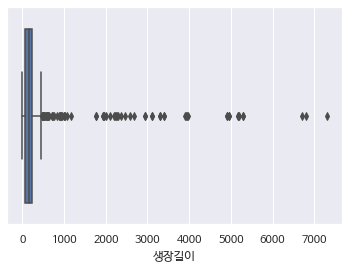

In [ ]:
sns.boxplot(x=df['생장길이'])

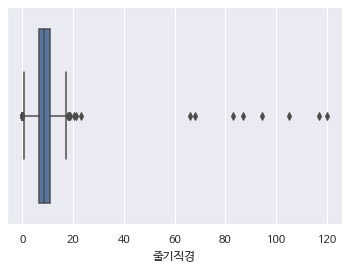

In [ ]:
sns.boxplot(x=df['줄기직경'])

In [ ]:
test_samples = [] #So theorically it is not data leackage 이론적으론 데이터 리키지가 아니다. 출제를 왜 이렇게 한거야. 암튼 이용함 ㅅㄱ
for i in range(train_eval['Sample_no'].unique()[-1]):
  if i not in train_eval['Sample_no'].unique():
    test_samples.append(i)

In [ ]:
len(test_samples)

510

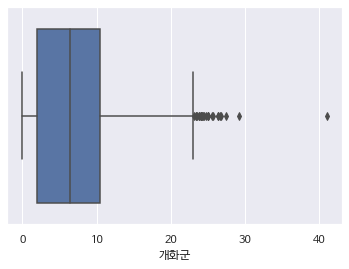

In [ ]:
sns.boxplot(x=df['개화군'])

In [ ]:
'''
  data의 형변환을 한게 데이터 자체의 성질을 잃게했는지 분석할 필요가 있어보인다
'''
df_form_ = copy.deepcopy(df)

In [ ]:
for i in df_form_.columns:
  print(i)
  if i == 'Sample_no':
    pass
  elif i == '주차':
    df_form_[i] = df_form_[i].astype('int')
  else:
    try:
      df_form_[i] = df_form_[i].astype('float')
    except:
      print('str')
      df_form_[i] = df_form_[i].astype('str')

Sample_no
시설ID
str
일
주차
내부CO2
내부습도
내부온도
지온
강우감지
일사량
외부온도
외부풍향
외부풍속
지습
급액횟수
급액EC(dS/m)
급액pH
급액량(회당)
품종
str
재배형태
str
조사일
생장길이
줄기직경
개화군


In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Sample_no    1019.25
dtype: float64


In [ ]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """Entry point for launching an IPython kernel.


(1518, 24)

In [ ]:
Q1 = df_form_.quantile(0.25)
Q3 = df_form_.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Sample_no      1019.250000
일             29270.428571
주차               18.000000
내부CO2           198.655140
내부습도             14.648929
내부온도              3.503776
지온               18.997336
강우감지              0.525536
일사량             619.303571
외부온도              9.050648
외부풍향            175.032832
외부풍속              0.947176
지습               57.358631
급액횟수              3.964286
급액EC(dS/m)        0.122500
급액pH              0.410000
급액량(회당)          15.116071
조사일           29291.000000
생장길이            162.250000
줄기직경              4.200000
개화군               8.407500
dtype: float64




---



In [ ]:
df_form = df_form_[~((df_form_ < (Q1 - 1.5 * IQR)) |(df_form_ > (Q3 + 1.5 * IQR))).any(axis=1)]
df_form.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """Entry point for launching an IPython kernel.


(901, 24)

In [ ]:
df_form

,Sample_no,시설ID,일,주차,내부CO2,내부습도,내부온도,지온,강우감지,일사량,...,급액횟수,급액EC(dS/m),급액pH,급액량(회당),품종,재배형태,조사일,생장길이,줄기직경,개화군
4,4,farm25,2.022038e+07,31,494.327381,82.880774,18.944345,0.0,NaN,2104.285714,...,14.285714,2.687143,5.078571,93.142857,tomato09,nan,20220406.0,175.0,5.8,17.40
5,5,farm25,2.022038e+07,31,494.327381,82.880774,18.944345,0.0,NaN,2104.285714,...,14.285714,2.687143,5.078571,93.142857,tomato09,nan,20220406.0,155.0,5.3,18.17
6,6,farm25,2.022038e+07,31,494.327381,82.880774,18.944345,0.0,NaN,2104.285714,...,14.285714,2.687143,5.078571,93.142857,tomato09,nan,20220406.0,195.0,8.2,17.00
7,7,farm25,2.022038e+07,31,494.327381,82.880774,18.944345,0.0,NaN,2104.285714,...,14.285714,2.687143,5.078571,93.142857,tomato09,nan,20220406.0,165.0,10.5,17.00
8,8,farm25,2.022041e+07,32,491.479167,87.201667,18.680833,0.0,NaN,1249.500000,...,11.000000,2.650000,5.535000,91.500000,tomato09,nan,20220413.0,125.0,4.2,18.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1491,1984,farm11,2.022039e+07,30,583.298631,79.393810,20.392857,0.0,NaN,0.000000,...,10.571429,2.604286,5.714286,90.142857,nan,수경,20220407.0,0.0,11.0,20.00
1492,1987,farm11,2.022039e+07,30,583.298631,79.393810,20.392857,0.0,NaN,0.000000,...,10.571429,2.604286,5.714286,90.142857,nan,수경,20220407.0,0.0,10.0,21.00
1493,1988,farm11,2.022042e+07,32,548.032431,77.304444,19.513889,0.0,NaN,0.000000,...,11.166667,2.595000,5.688333,88.833333,nan,수경,20220420.0,0.0,11.0,20.43
1494,1990,farm11,2.022042e+07,32,548.032431,77.304444,19.513889,0.0,NaN,0.000000,...,11.166667,2.595000,5.688333,88.833333,nan,수경,20220420.0,0.0,11.0,18.20


In [ ]:
df

,Sample_no,시설ID,일,주차,내부CO2,내부습도,내부온도,지온,강우감지,일사량,...,급액횟수,급액EC(dS/m),급액pH,급액량(회당),품종,재배형태,조사일,생장길이,줄기직경,개화군
0,0,farm25,20220326.166667,30,485.013889,83.768125,19.481597,0.0,NaN,1943.666667,...,14.0,2.696667,4.575,94.833333,tomato09,NaN,20220330.0,208.0,6.9,16.67
1,1,farm25,20220326.166667,30,485.013889,83.768125,19.481597,0.0,NaN,1943.666667,...,14.0,2.696667,4.575,94.833333,tomato09,NaN,20220330.0,172.0,6.8,17.33
2,2,farm25,20220326.166667,30,485.013889,83.768125,19.481597,0.0,NaN,1943.666667,...,14.0,2.696667,4.575,94.833333,tomato09,NaN,20220330.0,150.0,9.3,16.0
3,3,farm25,20220326.166667,30,485.013889,83.768125,19.481597,0.0,NaN,1943.666667,...,14.0,2.696667,4.575,94.833333,tomato09,NaN,20220330.0,121.0,5.9,16.2
4,4,farm25,20220382.285714,31,494.327381,82.880774,18.944345,0.0,NaN,2104.285714,...,14.285714,2.687143,5.078571,93.142857,tomato09,NaN,20220406.0,175.0,5.8,17.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1513,2020,farm04,20160816.666667,6,367.388301,57.832361,29.414653,NaN,NaN,2115.166667,...,26.5,2.4,5.216667,54.666667,tomato07,NaN,20160821.0,150.0,6.95,2.2
1514,2021,farm04,20160816.666667,6,367.388301,57.832361,29.414653,NaN,NaN,2115.166667,...,26.5,2.4,5.216667,54.666667,tomato07,NaN,20160821.0,140.0,10.13,1.4
1515,2022,farm04,20160816.666667,6,367.388301,57.832361,29.414653,NaN,NaN,2115.166667,...,26.5,2.4,5.216667,54.666667,tomato07,NaN,20160821.0,200.0,9.61,1.4
1516,2023,farm04,20160816.666667,6,367.388301,57.832361,29.414653,NaN,NaN,2115.166667,...,26.5,2.4,5.216667,54.666667,tomato07,NaN,20160821.0,210.0,8.47,2.2


In [ ]:
df.to_csv('Outliers.csv', index = False, encoding='utf-8')

In [ ]:
df_form

,Sample_no,시설ID,일,주차,내부CO2,내부습도,내부온도,지온,강우감지,일사량,...,급액횟수,급액EC(dS/m),급액pH,급액량(회당),품종,재배형태,조사일,생장길이,줄기직경,개화군
4,4,farm25,2.022038e+07,31,494.327381,82.880774,18.944345,0.0,NaN,2104.285714,...,14.285714,2.687143,5.078571,93.142857,tomato09,nan,20220406.0,175.0,5.8,17.40
5,5,farm25,2.022038e+07,31,494.327381,82.880774,18.944345,0.0,NaN,2104.285714,...,14.285714,2.687143,5.078571,93.142857,tomato09,nan,20220406.0,155.0,5.3,18.17
6,6,farm25,2.022038e+07,31,494.327381,82.880774,18.944345,0.0,NaN,2104.285714,...,14.285714,2.687143,5.078571,93.142857,tomato09,nan,20220406.0,195.0,8.2,17.00
7,7,farm25,2.022038e+07,31,494.327381,82.880774,18.944345,0.0,NaN,2104.285714,...,14.285714,2.687143,5.078571,93.142857,tomato09,nan,20220406.0,165.0,10.5,17.00
8,8,farm25,2.022041e+07,32,491.479167,87.201667,18.680833,0.0,NaN,1249.500000,...,11.000000,2.650000,5.535000,91.500000,tomato09,nan,20220413.0,125.0,4.2,18.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1491,1984,farm11,2.022039e+07,30,583.298631,79.393810,20.392857,0.0,NaN,0.000000,...,10.571429,2.604286,5.714286,90.142857,nan,수경,20220407.0,0.0,11.0,20.00
1492,1987,farm11,2.022039e+07,30,583.298631,79.393810,20.392857,0.0,NaN,0.000000,...,10.571429,2.604286,5.714286,90.142857,nan,수경,20220407.0,0.0,10.0,21.00
1493,1988,farm11,2.022042e+07,32,548.032431,77.304444,19.513889,0.0,NaN,0.000000,...,11.166667,2.595000,5.688333,88.833333,nan,수경,20220420.0,0.0,11.0,20.43
1494,1990,farm11,2.022042e+07,32,548.032431,77.304444,19.513889,0.0,NaN,0.000000,...,11.166667,2.595000,5.688333,88.833333,nan,수경,20220420.0,0.0,11.0,18.20


##Scatter, histogram

In [ ]:
df_form_

,Sample_no,시설ID,일,주차,내부CO2,내부습도,내부온도,지온,강우감지,일사량,...,급액횟수,급액EC(dS/m),급액pH,급액량(회당),품종,재배형태,조사일,생장길이,줄기직경,개화군
0,0,farm25,2.022033e+07,30,485.013889,83.768125,19.481597,0.0,NaN,1943.666667,...,14.000000,2.696667,4.575000,94.833333,tomato09,nan,20220330.0,208.0,6.90,16.67
1,1,farm25,2.022033e+07,30,485.013889,83.768125,19.481597,0.0,NaN,1943.666667,...,14.000000,2.696667,4.575000,94.833333,tomato09,nan,20220330.0,172.0,6.80,17.33
2,2,farm25,2.022033e+07,30,485.013889,83.768125,19.481597,0.0,NaN,1943.666667,...,14.000000,2.696667,4.575000,94.833333,tomato09,nan,20220330.0,150.0,9.30,16.00
3,3,farm25,2.022033e+07,30,485.013889,83.768125,19.481597,0.0,NaN,1943.666667,...,14.000000,2.696667,4.575000,94.833333,tomato09,nan,20220330.0,121.0,5.90,16.20
4,4,farm25,2.022038e+07,31,494.327381,82.880774,18.944345,0.0,NaN,2104.285714,...,14.285714,2.687143,5.078571,93.142857,tomato09,nan,20220406.0,175.0,5.80,17.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1513,2020,farm04,2.016082e+07,6,367.388301,57.832361,29.414653,NaN,NaN,2115.166667,...,26.500000,2.400000,5.216667,54.666667,tomato07,nan,20160821.0,150.0,6.95,2.20
1514,2021,farm04,2.016082e+07,6,367.388301,57.832361,29.414653,NaN,NaN,2115.166667,...,26.500000,2.400000,5.216667,54.666667,tomato07,nan,20160821.0,140.0,10.13,1.40
1515,2022,farm04,2.016082e+07,6,367.388301,57.832361,29.414653,NaN,NaN,2115.166667,...,26.500000,2.400000,5.216667,54.666667,tomato07,nan,20160821.0,200.0,9.61,1.40
1516,2023,farm04,2.016082e+07,6,367.388301,57.832361,29.414653,NaN,NaN,2115.166667,...,26.500000,2.400000,5.216667,54.666667,tomato07,nan,20160821.0,210.0,8.47,2.20


이건 진짜 너무하네ㅋㅋ

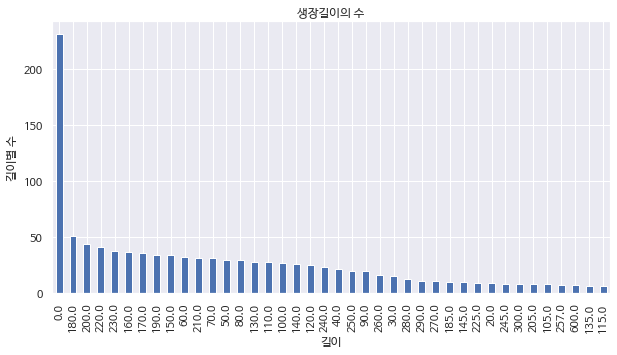

In [ ]:
df_form_.생장길이.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("생장길이의 수")
plt.ylabel('길이별 수')
plt.xlabel('길이');

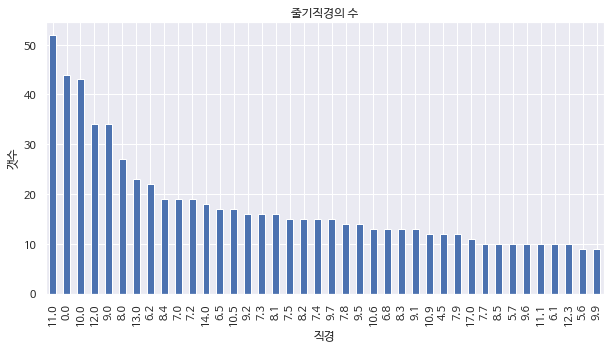

In [ ]:
df_form_.줄기직경.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("줄기직경의 수")
plt.ylabel('갯수')
plt.xlabel('직경');

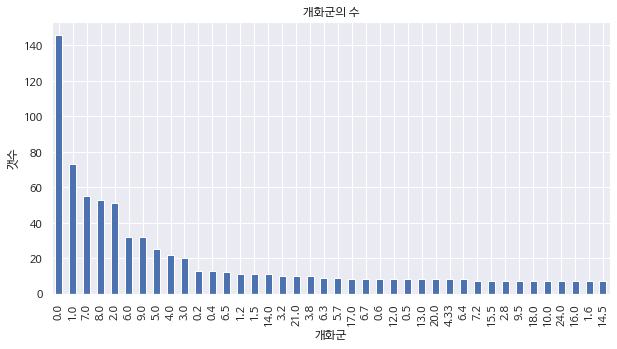

In [ ]:
df_form_.개화군.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("개화군의 수")
plt.ylabel('갯수')
plt.xlabel('개화군');

In [ ]:
train_input['강우감지'] = train_input['강우감지'].fillna(2)

In [ ]:
train_input.columns

Index(['Sample_no', '시설ID', '일', '주차', '내부CO2', '내부습도', '내부온도', '지온', '강우감지',
       '일사량', '외부온도', '외부풍향', '외부풍속', '지습', '급액횟수', '급액EC(dS/m)', '급액pH',
       '급액량(회당)', '품종', '재배형태'],
      dtype='object')

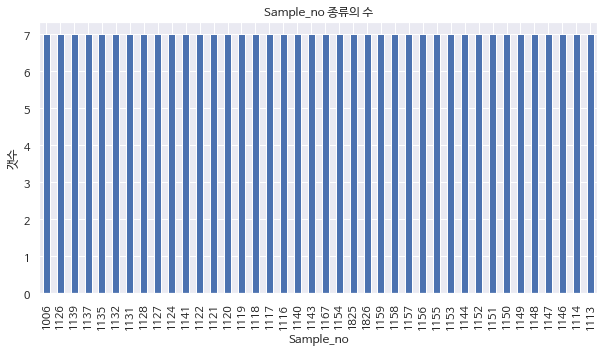

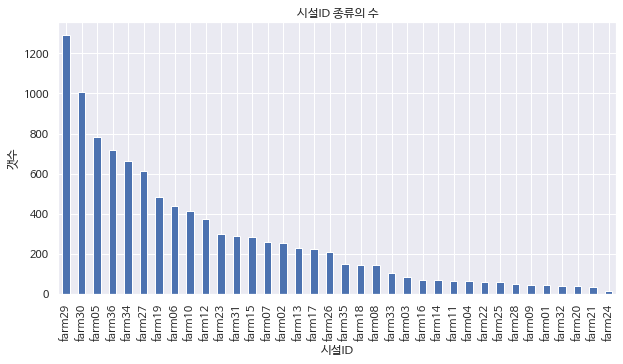

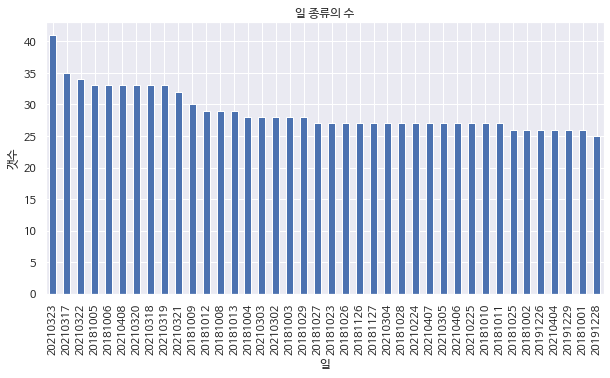

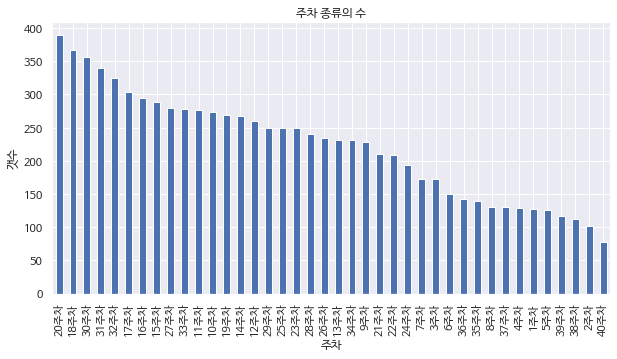

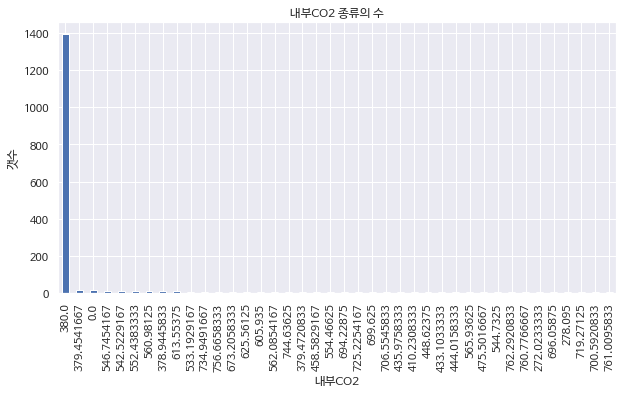

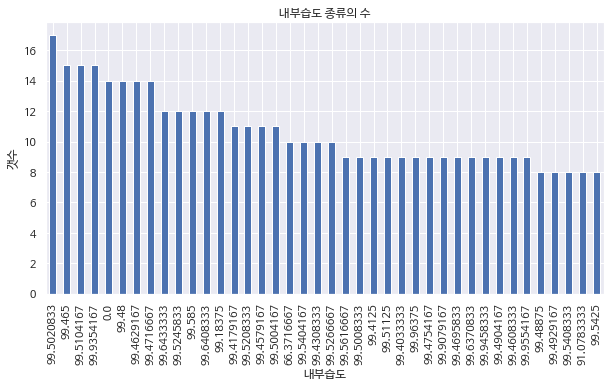

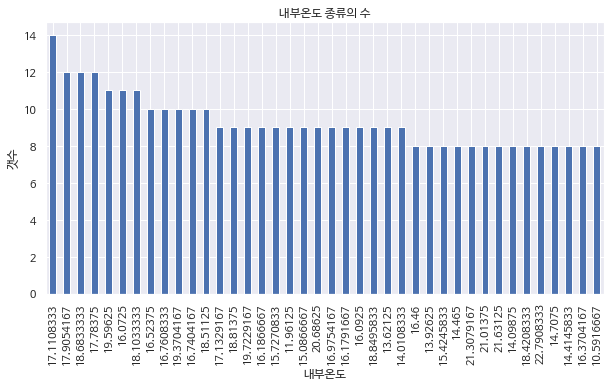

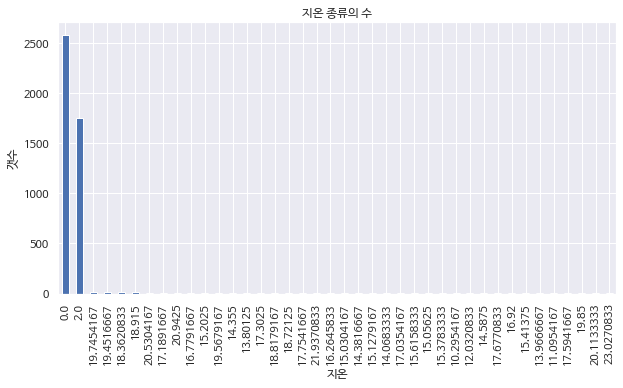

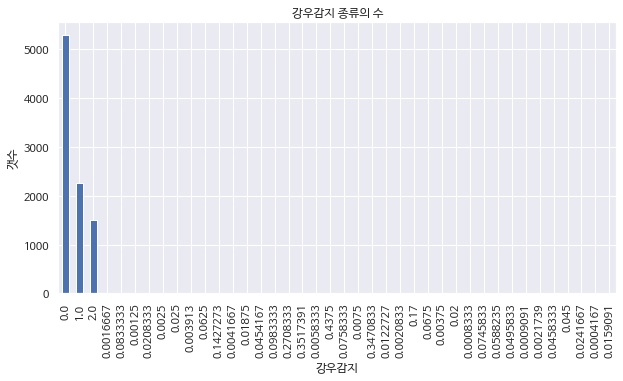

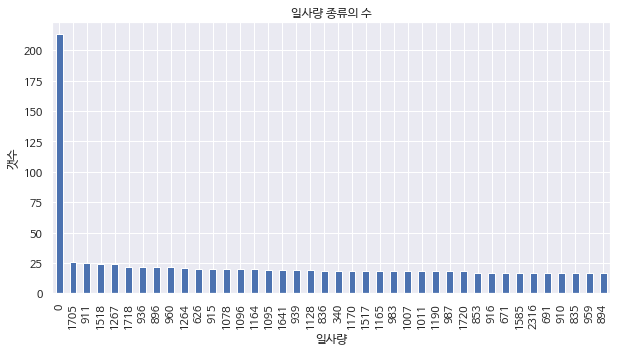

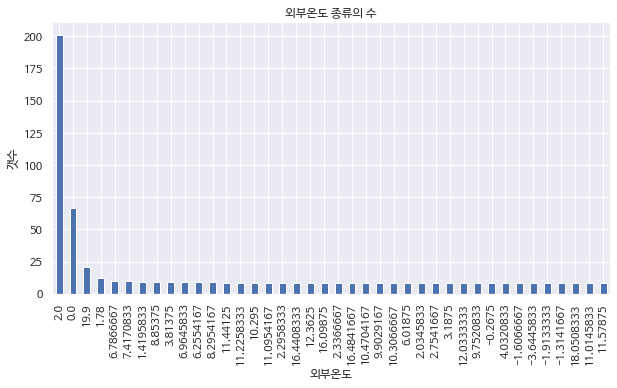

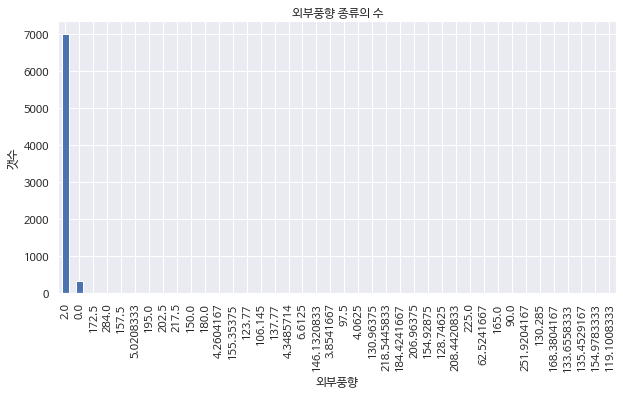

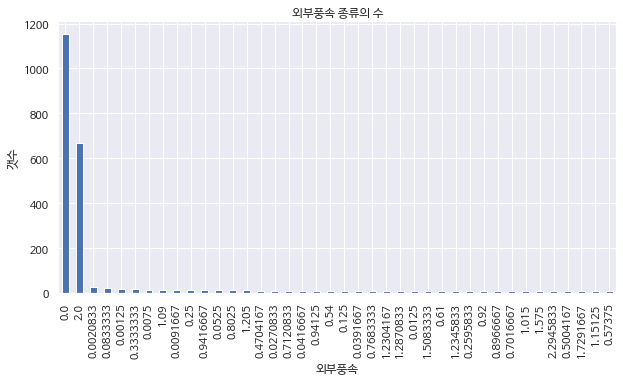

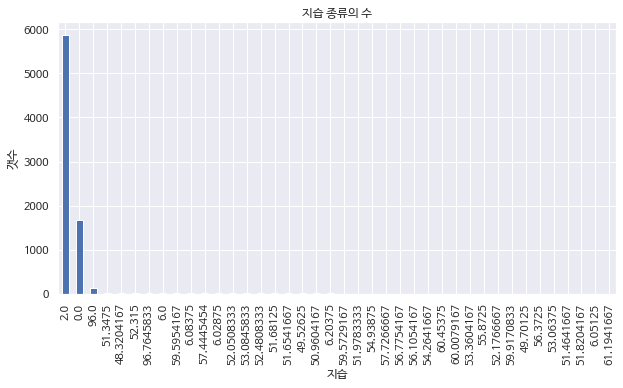

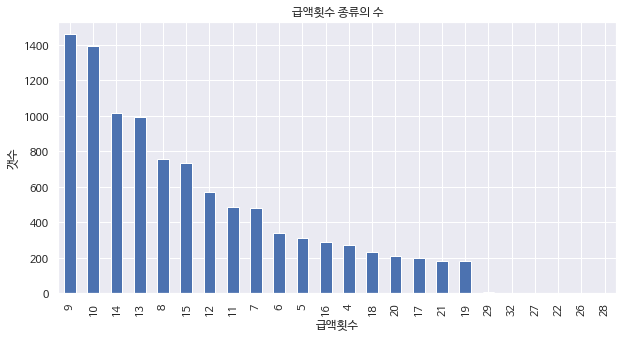

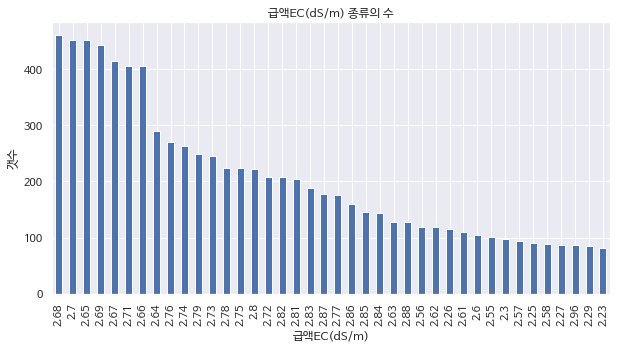

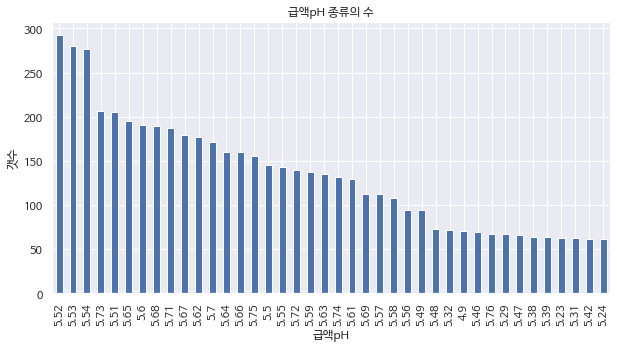

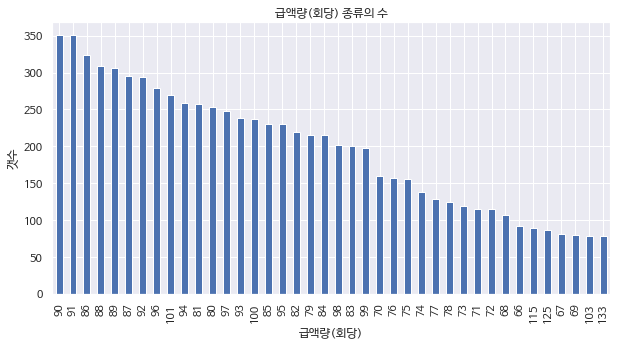

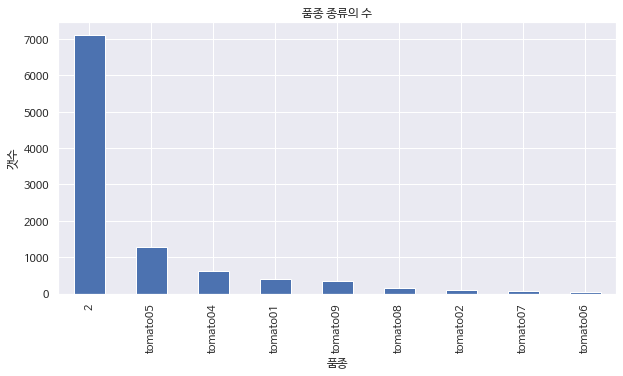

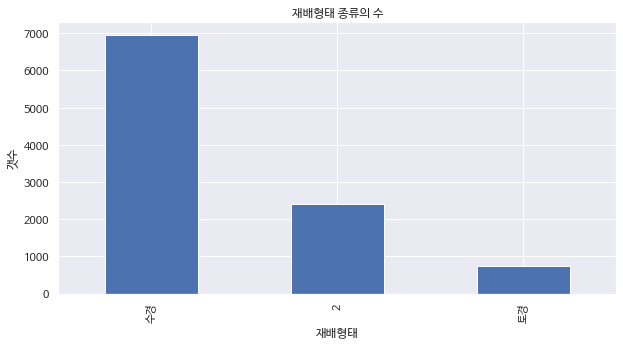

In [ ]:
for i in train_input.columns:
  #train_input[i].value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
  train_input[i].fillna(2).value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
  plt.title(f"{i} 종류의 수")
  plt.ylabel('갯수')
  plt.xlabel(f'{i}');
  plt.show();

In [ ]:
len(train_input[train_input['내부CO2'] == 380.0])

1390

In [ ]:
len(train_input)-(len(train_input[train_input['지습'].fillna(2)==2.0])+len(train_input[train_input['지습'].fillna(2)==0.0])+len(train_input[train_input['지습'].fillna(2)==96.0]))

2428


1.  품종 종류의 수, 재배형태 = object
2.  급액량,급액횟수,외부풍향, 내부CO2(380 outlier),주차,일(변환) = int
3.  급액pH,급액EC,지습*(결측치 80퍼센트 이상),외부풍속,외부온도(드랍할까),일사량,지온, 내부온도,내부습도,(대수법칙 따름) = float
4.  강우감지 = Boolean

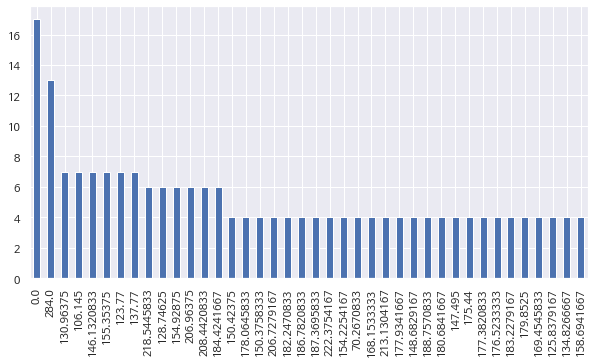

In [ ]:
train_input[train_input['내부CO2'] == 380.0].내부습도.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))

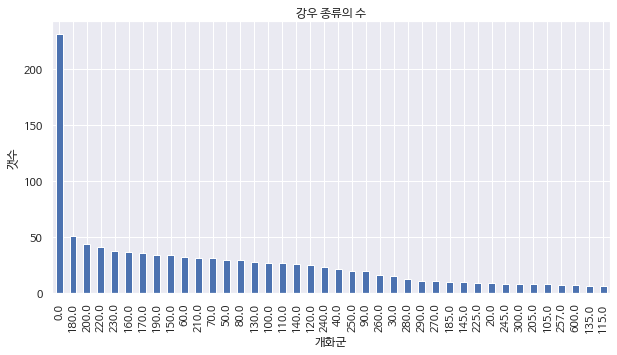

In [ ]:
train_gt.생장길이.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("강우 종류의 수")
plt.ylabel('갯수')
plt.xlabel('개화군');

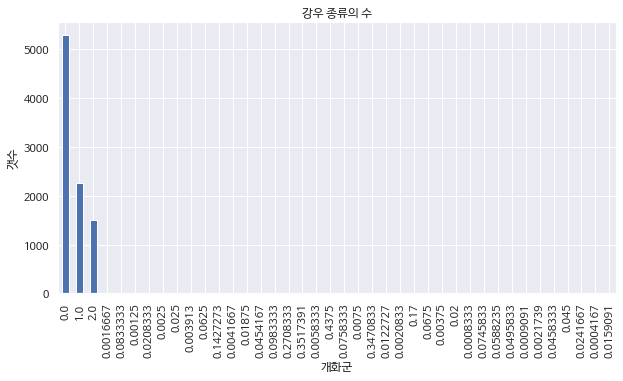

In [ ]:
train_input.강우감지.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("강우 종류의 수")
plt.ylabel('갯수')
plt.xlabel('개화군');

0,1,nan을 제외하고 대수법칙을 따르지 않음 -> 노이즈 값이라고 추측

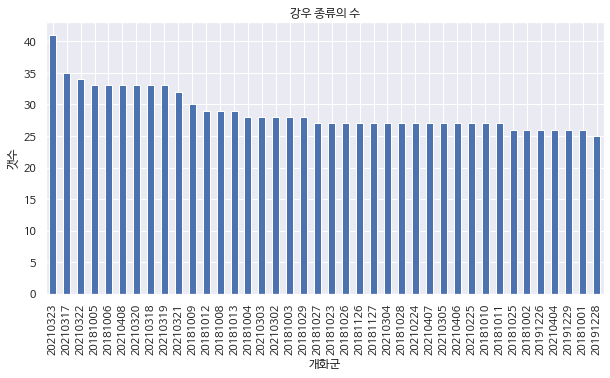

In [ ]:
train_input.일.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("강우 종류의 수")
plt.ylabel('갯수')
plt.xlabel('개화군');

### Heat Maps

In [ ]:
Heat = df_form_.drop(['Sample_no'],axis = 1)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


,일,주차,내부CO2,내부습도,내부온도,지온,강우감지,일사량,외부온도,외부풍향,외부풍속,지습,급액횟수,급액EC(dS/m),급액pH,급액량(회당),조사일,생장길이,줄기직경,개화군
일,1.000000,-0.093489,-0.020994,-0.230887,-0.086210,0.108751,-0.191185,0.287482,0.054286,-0.566622,-0.330666,-0.158291,0.169181,-0.175480,-0.237036,-0.146077,0.998848,-0.113722,0.056046,0.292860
주차,-0.093489,1.000000,-0.239971,0.080451,-0.048032,-0.093024,0.056852,0.110483,0.063693,0.334493,0.180908,0.109538,0.049885,0.100036,-0.203560,0.042985,-0.095611,-0.107992,-0.102130,0.263588
내부CO2,-0.020994,-0.239971,1.000000,0.094020,0.046912,0.365541,0.019020,-0.068344,-0.123685,-0.515644,0.087980,-0.090097,-0.164622,0.204740,-0.049469,0.024038,-0.018169,-0.020279,0.008325,0.033862
내부습도,-0.230887,0.080451,0.094020,1.000000,0.150512,0.000548,0.183926,-0.038508,-0.082772,0.066969,0.771906,0.056433,-0.202975,0.263344,-0.044090,0.119859,-0.230435,-0.006622,-0.040398,-0.128519
내부온도,-0.086210,-0.048032,0.046912,0.150512,1.000000,0.147614,-0.166452,0.172493,0.319243,0.497121,0.127528,0.134391,-0.074874,0.197939,-0.087497,0.053174,-0.089614,0.056820,-0.026257,-0.144867
지온,0.108751,-0.093024,0.365541,0.000548,0.147614,1.000000,0.277234,0.262028,0.221388,-0.588938,0.063537,0.703519,0.073349,-0.035046,-0.160509,-0.046768,0.107580,0.095778,-0.086306,0.118548
강우감지,-0.191185,0.056852,0.019020,0.183926,-0.166452,0.277234,1.000000,-0.117079,-0.094043,-0.042134,0.137781,0.080977,-0.052689,0.070240,0.092509,0.009875,-0.191365,-0.014817,-0.135092,0.146085
일사량,0.287482,0.110483,-0.068344,-0.038508,0.172493,0.262028,-0.117079,1.000000,0.457076,-0.152392,-0.006282,0.150997,0.574303,-0.318778,-0.556695,-0.182955,0.279658,0.085860,-0.080150,0.218541
외부온도,0.054286,0.063693,-0.123685,-0.082772,0.319243,0.221388,-0.094043,0.457076,1.000000,0.050038,-0.054561,0.112995,0.504022,-0.403719,-0.202956,-0.063530,0.045664,0.079566,-0.070334,0.098781
외부풍향,-0.566622,0.334493,-0.515644,0.066969,0.497121,-0.588938,-0.042134,-0.152392,0.050038,1.000000,-0.054838,-0.124033,-0.329322,0.469046,0.136283,0.187531,-0.570683,-0.124485,0.092223,-0.157019


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)


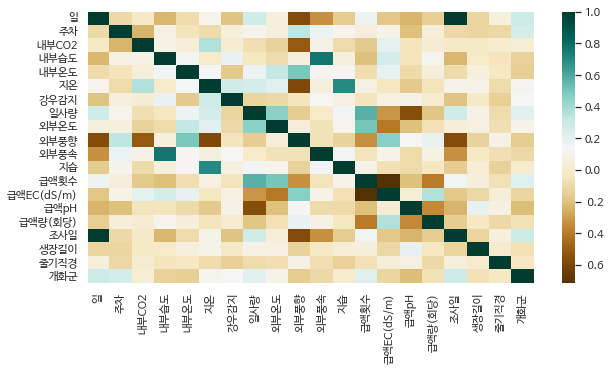

In [ ]:
plt.figure(figsize=(10,5))
c= Heat.corr()
sns.heatmap(c,cmap="BrBG")
c

In [ ]:
Heat['양액량'] = Heat['급액횟수'] * Heat['급액량(회당)']
Heat['내염성지수'] = Heat['양액량'] / Heat['급액EC(dS/m)']
Heat['화아분화촉진성_L1'] = Heat['일사량']/Heat['급액EC(dS/m)']   #화아분화촉진성_l1
Heat['화아분화촉진성_L2'] = Heat['내부온도']/Heat['급액EC(dS/m)'] #화아분화촉진성_l2

In [ ]:
Heat['일'] = Heat['일'] - 20150000
Heat['조사일'] = Heat['조사일'] - 20150000

,일,주차,내부CO2,내부습도,내부온도,지온,강우감지,일사량,외부온도,외부풍향,...,급액pH,급액량(회당),조사일,생장길이,줄기직경,개화군,양액량,내염성지수,화아분화촉진성_L1,화아분화촉진성_L2
일,1.000000,-0.093489,-0.020994,-0.230887,-0.086210,0.108751,-0.191185,0.287482,0.054286,-0.566622,...,-0.237036,-0.146077,0.998848,-0.113722,0.056046,0.292860,0.121996,0.153516,0.298810,-0.038324
주차,-0.093489,1.000000,-0.239971,0.080451,-0.048032,-0.093024,0.056852,0.110483,0.063693,0.334493,...,-0.203560,0.042985,-0.095611,-0.107992,-0.102130,0.263588,0.107072,0.071812,0.081008,-0.083169
내부CO2,-0.020994,-0.239971,1.000000,0.094020,0.046912,0.365541,0.019020,-0.068344,-0.123685,-0.515644,...,-0.049469,0.024038,-0.018169,-0.020279,0.008325,0.033862,-0.169219,-0.188142,-0.080861,0.012440
내부습도,-0.230887,0.080451,0.094020,1.000000,0.150512,0.000548,0.183926,-0.038508,-0.082772,0.066969,...,-0.044090,0.119859,-0.230435,-0.006622,-0.040398,-0.128519,-0.127365,-0.182177,-0.078226,0.090719
내부온도,-0.086210,-0.048032,0.046912,0.150512,1.000000,0.147614,-0.166452,0.172493,0.319243,0.497121,...,-0.087497,0.053174,-0.089614,0.056820,-0.026257,-0.144867,-0.026616,-0.090970,0.132732,0.965051
지온,0.108751,-0.093024,0.365541,0.000548,0.147614,1.000000,0.277234,0.262028,0.221388,-0.588938,...,-0.160509,-0.046768,0.107580,0.095778,-0.086306,0.118548,0.077746,0.068711,0.248005,0.162971
강우감지,-0.191185,0.056852,0.019020,0.183926,-0.166452,0.277234,1.000000,-0.117079,-0.094043,-0.042134,...,0.092509,0.009875,-0.191365,-0.014817,-0.135092,0.146085,-0.034438,-0.049752,-0.134577,-0.197654
일사량,0.287482,0.110483,-0.068344,-0.038508,0.172493,0.262028,-0.117079,1.000000,0.457076,-0.152392,...,-0.556695,-0.182955,0.279658,0.085860,-0.080150,0.218541,0.565075,0.550856,0.985649,0.268498
외부온도,0.054286,0.063693,-0.123685,-0.082772,0.319243,0.221388,-0.094043,0.457076,1.000000,0.050038,...,-0.202956,-0.063530,0.045664,0.079566,-0.070334,0.098781,0.528353,0.529333,0.491323,0.430572
외부풍향,-0.566622,0.334493,-0.515644,0.066969,0.497121,-0.588938,-0.042134,-0.152392,0.050038,1.000000,...,0.136283,0.187531,-0.570683,-0.124485,0.092223,-0.157019,-0.243112,-0.323291,-0.211264,0.347041


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)


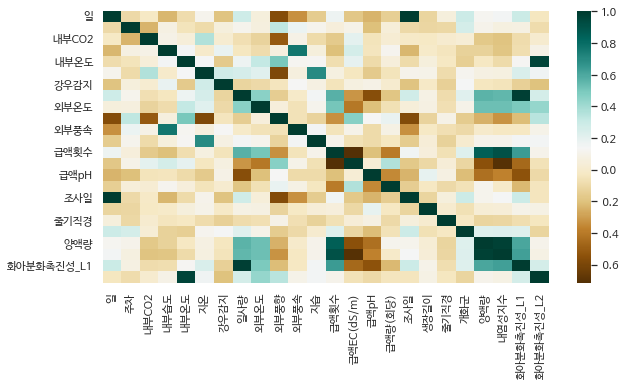

In [ ]:
plt.figure(figsize=(10,5))
c= Heat.corr()
sns.heatmap(c,cmap="BrBG")
c

### Scatterplot

We generally use scatter plots to find the correlation between two variables. Here the scatter plots are plotted between Horsepower and Price and we can see the plot below. With the plot given below, we can easily draw a trend line. These features provide a good scattering of points.

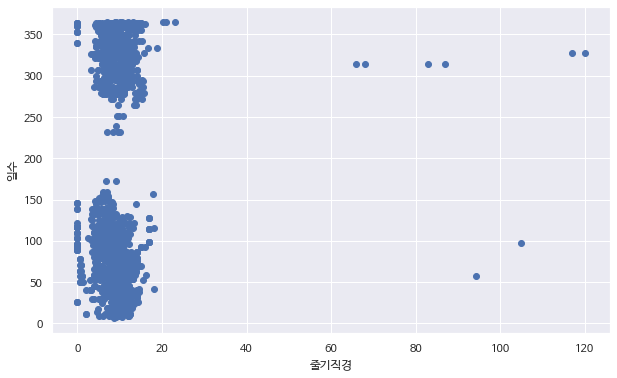

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(train_eval['줄기직경'], train_eval['일수'])
ax.set_xlabel('줄기직경')
ax.set_ylabel('일수')
plt.show()

In [ ]:
train_input.강우감지.unique()

array([2.000000e+00, 1.000000e+00, 0.000000e+00, 2.500000e-03,
       2.158333e-01, 7.458330e-02, 8.333300e-03, 5.000000e-02,
       9.166670e-02, 4.012500e-01, 1.000000e-02, 3.304167e-01,
       1.875000e-02, 5.250000e-02, 3.858333e-01, 3.750000e-03,
       6.583330e-02, 1.162500e-01, 1.291670e-02, 1.250000e-03,
       7.208330e-02, 1.708330e-02, 8.333000e-04, 4.166700e-03,
       1.545833e-01, 4.583300e-03, 4.167000e-04, 1.650000e-01,
       1.666700e-03, 1.666670e-02, 1.958333e-01, 1.625000e-02,
       4.583330e-02, 4.645833e-01, 1.800000e-01, 1.816667e-01,
       1.841667e-01, 9.916670e-02, 4.958330e-02, 2.708333e-01,
       1.700000e-01, 2.000000e-01, 3.516667e-01, 1.812500e-01,
       6.375000e-02, 2.604167e-01, 1.052632e-01, 3.956520e-02,
       2.250000e-02, 4.166670e-02, 1.895652e-01, 7.083330e-02,
       4.233333e-01, 2.221053e-01, 5.041670e-02, 2.913636e-01,
       1.714290e-02, 2.771429e-01, 2.272727e-01, 4.213043e-01,
       4.266667e-01, 1.591667e-01, 3.041670e-02, 4.8571

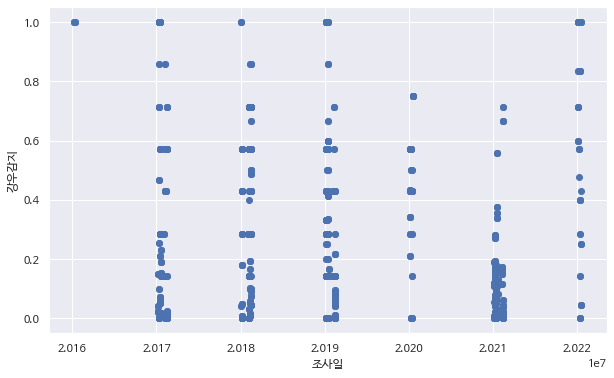

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df_form_['조사일'], df_form_['강우감지'])
ax.set_xlabel('조사일')
ax.set_ylabel('강우감지')
plt.show()

#Lets Try making Time-series feature parameter(시계열성 갖는 피쳐 만들어보기)

##Data pre processing

먼저 데이터 정돈

### Dropping irrelevant columns
 문제의 복잡도 및 학습속도 최적화를 위해서 사용하지 않는 변수를 드랍할 것이다. 지습의 경우,과반 이상이 Nan에 해당하는 결측치였고, 나머지 마저도 0과 0.96에 해당하는 에러값에 근접한 값이었으며, 해당하는 값이 있더라도 제대로 사용하기가 어려운 상태이다.

In [ ]:
def drop_columns(df, list):
  if len(list) == 0:
    return False
  for i in list:
    df = df.drop(i,axis = 1)
  return df

In [ ]:
train_input.columns

Index(['Sample_no', '시설ID', '일', '주차', '내부CO2', '내부습도', '내부온도', '지온', '강우감지',
       '일사량', '외부온도', '외부풍향', '외부풍속', '지습', '급액횟수', '급액EC(dS/m)', '급액pH',
       '급액량(회당)', '품종', '재배형태'],
      dtype='object')

In [ ]:
train_input = drop_columns(train_input, ['지습'])

In [ ]:
test_input = drop_columns(test_input, ['지습'])

###Change the type and distribution of the data

In [ ]:
train_input['품종'] = train_input['품종'].fillna('unknown')

In [ ]:
test_input['품종'] = test_input['품종'].fillna('unknown')

In [ ]:
train_input['품종'].unique()

array(['tomato09', 'tomato02', 'unknown', 'tomato08', 'tomato05',
       'tomato04', 'tomato01', 'tomato06', 'tomato07'], dtype=object)

In [ ]:
train_input['재배형태'] = train_input['재배형태'].fillna('unknown')

In [ ]:
test_input['재배형태'] = test_input['재배형태'].fillna('unknown')

In [ ]:
train_input['재배형태'].unique()

array(['unknown', '수경', '토경'], dtype=object)

In [ ]:
#train
train_input['급액량(회당)'] = train_input['급액량(회당)'].astype('int')
train_input['급액횟수'] = train_input['급액횟수'].astype('int')
train_input['외부풍향'] = train_input['외부풍향'].fillna(0).astype('int')

In [ ]:
#test
test_input['급액량(회당)'] = test_input['급액량(회당)'].astype('int')
test_input['급액횟수'] = test_input['급액횟수'].astype('int')
test_input['외부풍향'] = test_input['외부풍향'].fillna(0).astype('int')

일(20220302) 를 일수(61일차)와 년차(2022)로 나누기

In [ ]:
train_input['일수'] = 0
for i in tqdm.tqdm(range(len(train_input))):
  train_input['일수'].iloc[i] = (datetime.strptime(str(train_input['일'].iloc[i]), '%Y%m%d').date() - datetime(datetime.strptime(str(train_input['일'].iloc[i]), '%Y%m%d').date().year,1,1).date()).days

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
train_input['년차'] = 0
for i in tqdm.tqdm(range(len(train_input))):
  train_input['년차'].iloc[i] = datetime.strptime(str(train_input['일'].iloc[i]), '%Y%m%d').date().year

  0%|          | 0/10112 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
100%|██████████| 10112/10112 [00:06<00:00, 1492.15it/s]


In [ ]:
test_input['년차'] = 0
test_input['일수'] = 0
for i in tqdm.tqdm(range(len(test_input))):
  test_input['일수'].iloc[i] = (datetime.strptime(str(test_input['일'].iloc[i]), '%Y%m%d').date() - datetime(datetime.strptime(str(test_input['일'].iloc[i]), '%Y%m%d').date().year,1,1).date()).days
for i in tqdm.tqdm(range(len(test_input))):
  test_input['년차'].iloc[i] = datetime.strptime(str(test_input['일'].iloc[i]), '%Y%m%d').date().year

  0%|          | 0/3369 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
100%|██████████| 3369/3369 [00:01<00:00, 2270.74it/s]


In [ ]:
train_input = train_input.drop(['일'],axis=1)

In [ ]:
test_input = test_input.drop(['일'],axis=1)

아웃라이어인 내부CO2의 380을 0으로 바꾸고, 자료형 float로 바꾸기

In [ ]:
train_input.loc[train_input['내부CO2']==380.00, '내부CO2'] = 0

In [ ]:
test_input.loc[test_input['내부CO2']==380.00, '내부CO2'] = 0

In [ ]:
train_input['내부CO2'] = train_input['내부CO2'].astype('float')

In [ ]:
test_input['내부CO2'] = test_input['내부CO2'].astype('float')

주차를 int형으로 바꾸기

In [ ]:
train_input['주차'] = train_input['주차'].str.extract('(\d+)').astype(int)[0]

In [ ]:
test_input['주차'] = test_input['주차'].str.extract('(\d+)').astype(int)[0]

강우감지를 boolean으로 바꾸기

In [ ]:
train_input.loc[train_input['강우감지'].fillna(0) <= 0.5, '강우감지'] = 0 #0.5보다 작으면 false 아니면 true

In [ ]:
test_input.loc[test_input['강우감지'].fillna(0) <= 0.5, '강우감지'] = 0 #0.5보다 작으면 false 아니면 true

In [ ]:
train_input['강우감지'] = train_input['강우감지'].astype('bool')

In [ ]:
test_input['강우감지'] = test_input['강우감지'].astype('bool')

train_gt의 조사일과 주차에도 똑같은 작업

In [ ]:
train_gt['주차'] = train_gt['주차'].str.extract('(\d+)').astype(int)[0]

In [ ]:
train_gt['조사년도'] = 0
train_gt['조사일수'] = 0
for i in range(len(train_gt)):
  train_gt['조사일수'].iloc[i] = (datetime.strptime(str(train_gt['조사일'].iloc[i]), '%Y%m%d').date() - datetime(datetime.strptime(str(train_gt['조사일'].iloc[i]), '%Y%m%d').date().year,1,1).date()).days
for i in range(len(train_gt)):
  train_gt['조사년도'].iloc[i] = datetime.strptime(str(train_gt['조사일'].iloc[i]), '%Y%m%d').date().year

In [ ]:
train_gt = drop_columns(train_gt, ['조사일'])

gt의 값 바꿔주기

In [ ]:
train_gt['생장길이'] = train_gt['생장길이'].astype('int')
train_gt['줄기직경'] = train_gt['줄기직경'].astype('float')
train_gt['개화군'] = train_gt['개화군'].astype('float')

제출값의 조사일과 주차에도 똑같은 작업

In [ ]:
sub['주차'] = sub['주차'].str.extract('(\d+)').astype(int)[0]

In [ ]:
sub['조사년도'] = 0
sub['조사일수'] = 0
for i in range(len(sub)):
  sub['조사일수'].iloc[i] = (datetime.strptime(str(sub['조사일'].iloc[i]), '%Y%m%d').date() - datetime(datetime.strptime(str(sub['조사일'].iloc[i]), '%Y%m%d').date().year,1,1).date()).days
for i in range(len(sub)):
  sub['조사년도'].iloc[i] = datetime.strptime(str(sub['조사일'].iloc[i]), '%Y%m%d').date().year

In [ ]:
sub = drop_columns(sub, ['조사일'])

제출값의 형변환

In [ ]:
sub['생장길이'] = sub['생장길이'].astype('int')
sub['줄기직경'] = sub['줄기직경'].astype('float')
sub['개화군'] = sub['개화군'].astype('float')

개화군, 줄기직경, 생장길이에 대해 형변환 작업

In [ ]:
train_gt

,Sample_no,주차,생장길이,줄기직경,개화군,조사년도,조사일수
0,0,30,208,6.90,16.67,2022,88
1,1,30,172,6.80,17.33,2022,88
2,2,30,150,9.30,16.00,2022,88
3,3,30,121,5.90,16.20,2022,88
4,4,31,175,5.80,17.40,2022,95
...,...,...,...,...,...,...,...
1513,2020,6,150,6.95,2.20,2016,233
1514,2021,6,140,10.13,1.40,2016,233
1515,2022,6,200,9.61,1.40,2016,233
1516,2023,6,210,8.47,2.20,2016,233


###handling nan(결측치 제거- 생각해보니 결측치는 여기서 제거해야 한다)

interpolate for significent value(정확도 낮아져 스킵)

In [ ]:
'''for i in tqdm.tqdm(train_input.Sample_no.unique()):
  for j in test_input.columns[1:]:
    train_input.loc[train_input['Sample_no'] == i, j] = train_input.loc[train_input['Sample_no'] == i, j].interpolate()'''

"for i in tqdm.tqdm(train_input.Sample_no.unique()):\n  for j in test_input.columns[1:]:\n    train_input.loc[train_input['Sample_no'] == i, j] = train_input.loc[train_input['Sample_no'] == i, j].interpolate()"

In [ ]:
train_input.head()

,Sample_no,시설ID,주차,내부CO2,내부습도,내부온도,지온,강우감지,일사량,외부온도,외부풍향,외부풍속,급액횟수,급액EC(dS/m),급액pH,급액량(회당),품종,재배형태,일수,년차
0,0,farm25,30,517.041667,84.985417,20.610833,0.0,False,1879,11.166667,195,0.083333,14,2.68,4.42,88,tomato09,unknown,81,2022
1,0,farm25,30,514.416667,88.291250,20.695000,0.0,False,1411,12.708333,142,0.000000,14,2.78,5.63,97,tomato09,unknown,82,2022
2,0,farm25,30,471.875000,83.514583,20.402500,0.0,False,1955,8.791667,202,0.000000,14,2.69,4.25,101,tomato09,unknown,84,2022
3,0,farm25,30,469.250000,80.916250,20.139167,0.0,False,2231,8.041667,180,0.000000,14,2.70,4.25,99,tomato09,unknown,85,2022
4,0,farm25,30,465.750000,82.026250,17.653333,0.0,False,2284,9.000000,97,0.041667,13,2.66,4.21,94,tomato09,unknown,86,2022


In [ ]:
train_input

,Sample_no,시설ID,주차,내부CO2,내부습도,내부온도,지온,강우감지,일사량,외부온도,외부풍향,외부풍속,급액횟수,급액EC(dS/m),급액pH,급액량(회당),품종,재배형태,일수,년차
0,0,farm25,30,517.041667,84.985417,20.610833,0.0,False,1879,11.166667,195,0.083333,14,2.68,4.42,88,tomato09,unknown,81,2022
1,0,farm25,30,514.416667,88.291250,20.695000,0.0,False,1411,12.708333,142,0.000000,14,2.78,5.63,97,tomato09,unknown,82,2022
2,0,farm25,30,471.875000,83.514583,20.402500,0.0,False,1955,8.791667,202,0.000000,14,2.69,4.25,101,tomato09,unknown,84,2022
3,0,farm25,30,469.250000,80.916250,20.139167,0.0,False,2231,8.041667,180,0.000000,14,2.70,4.25,99,tomato09,unknown,85,2022
4,0,farm25,30,465.750000,82.026250,17.653333,0.0,False,2284,9.000000,97,0.041667,13,2.66,4.21,94,tomato09,unknown,86,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10107,2027,farm04,7,334.684002,65.565417,21.985833,NaN,False,979,NaN,0,NaN,26,2.06,5.80,81,tomato07,unknown,233,2016
10108,2027,farm04,7,333.726601,61.144167,22.530833,NaN,False,2515,NaN,0,NaN,28,2.43,4.42,32,tomato07,unknown,234,2016
10109,2027,farm04,7,344.862883,72.867917,20.397917,NaN,False,1972,NaN,0,NaN,21,2.71,5.88,27,tomato07,unknown,235,2016
10110,2027,farm04,7,372.708516,66.672917,24.401667,NaN,False,1314,NaN,0,NaN,18,2.50,5.39,82,tomato07,unknown,238,2016


fillna to 0 for np.nan

In [ ]:
for i in tqdm.tqdm(test_input.columns[1:]):
  train_input[i] = train_input[i].fillna(0)

100%|██████████| 19/19 [00:00<00:00, 1428.63it/s]


In [ ]:
train_input.head()

,Sample_no,시설ID,주차,내부CO2,내부습도,내부온도,지온,강우감지,일사량,외부온도,외부풍향,외부풍속,급액횟수,급액EC(dS/m),급액pH,급액량(회당),품종,재배형태,일수,년차
0,0,farm25,30,517.041667,84.985417,20.610833,0.0,False,1879,11.166667,195,0.083333,14,2.68,4.42,88,tomato09,unknown,81,2022
1,0,farm25,30,514.416667,88.291250,20.695000,0.0,False,1411,12.708333,142,0.000000,14,2.78,5.63,97,tomato09,unknown,82,2022
2,0,farm25,30,471.875000,83.514583,20.402500,0.0,False,1955,8.791667,202,0.000000,14,2.69,4.25,101,tomato09,unknown,84,2022
3,0,farm25,30,469.250000,80.916250,20.139167,0.0,False,2231,8.041667,180,0.000000,14,2.70,4.25,99,tomato09,unknown,85,2022
4,0,farm25,30,465.750000,82.026250,17.653333,0.0,False,2284,9.000000,97,0.041667,13,2.66,4.21,94,tomato09,unknown,86,2022


replace text 'nan' to 0

In [ ]:
for i in tqdm.tqdm(test_input.columns[1:]):
  train_input[i] = train_input[i].replace('nan', 0)

100%|██████████| 19/19 [00:00<00:00, 1846.08it/s]


In [ ]:
train_input.head()

,Sample_no,시설ID,주차,내부CO2,내부습도,내부온도,지온,강우감지,일사량,외부온도,외부풍향,외부풍속,급액횟수,급액EC(dS/m),급액pH,급액량(회당),품종,재배형태,일수,년차
0,0,farm25,30,517.041667,84.985417,20.610833,0.0,False,1879,11.166667,195,0.083333,14,2.68,4.42,88,tomato09,unknown,81,2022
1,0,farm25,30,514.416667,88.291250,20.695000,0.0,False,1411,12.708333,142,0.000000,14,2.78,5.63,97,tomato09,unknown,82,2022
2,0,farm25,30,471.875000,83.514583,20.402500,0.0,False,1955,8.791667,202,0.000000,14,2.69,4.25,101,tomato09,unknown,84,2022
3,0,farm25,30,469.250000,80.916250,20.139167,0.0,False,2231,8.041667,180,0.000000,14,2.70,4.25,99,tomato09,unknown,85,2022
4,0,farm25,30,465.750000,82.026250,17.653333,0.0,False,2284,9.000000,97,0.041667,13,2.66,4.21,94,tomato09,unknown,86,2022


Do same process to test_data

In [ ]:
'''for i in tqdm.tqdm(test_input.Sample_no.unique()):
  for j in (test_input.columns[1:]):
    test_input.loc[test_input['Sample_no'] == i,j] = test_input.loc[test_input['Sample_no'] == i,j].interpolate()'''

"for i in tqdm.tqdm(test_input.Sample_no.unique()):\n  for j in (test_input.columns[1:]):\n    test_input.loc[test_input['Sample_no'] == i,j] = test_input.loc[test_input['Sample_no'] == i,j].interpolate()"

In [ ]:
for i in tqdm.tqdm(test_input.columns[1:]):
  test_input[i] = test_input[i].fillna(0)
  test_input[i] = test_input[i].replace('nan', 0)

100%|██████████| 19/19 [00:00<00:00, 1764.81it/s]


In [ ]:
test_input

,Sample_no,시설ID,주차,내부CO2,내부습도,내부온도,지온,강우감지,일사량,외부온도,외부풍향,외부풍속,급액횟수,급액EC(dS/m),급액pH,급액량(회당),품종,재배형태,년차,일수
0,9,farm25,32,504.875000,93.500417,18.375417,0.000000,False,365,14.291667,165,0.291667,8,2.65,5.75,93,tomato09,unknown,2022,95
1,9,farm25,32,478.083333,80.902917,18.986250,0.000000,False,2134,13.625000,217,0.125000,14,2.65,5.32,90,tomato09,unknown,2022,101
2,12,farm33,30,424.525833,83.809583,20.238750,19.531667,False,1538,9.300833,163,0.893750,14,2.83,5.60,87,tomato02,unknown,2017,63
3,12,farm33,30,391.438333,83.613333,20.596667,19.943333,False,1481,10.799167,232,1.194583,13,2.82,5.71,97,tomato02,unknown,2017,64
4,12,farm33,30,394.758333,85.027500,20.460833,20.040417,False,1478,10.161667,173,1.075417,15,2.83,5.59,92,tomato02,unknown,2017,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3364,2026,farm04,7,334.684002,65.565417,21.985833,0.000000,False,979,0.000000,0,0.000000,26,2.06,5.80,81,tomato07,unknown,2016,233
3365,2026,farm04,7,333.726601,61.144167,22.530833,0.000000,False,2515,0.000000,0,0.000000,28,2.43,4.42,32,tomato07,unknown,2016,234
3366,2026,farm04,7,344.862883,72.867917,20.397917,0.000000,False,1972,0.000000,0,0.000000,21,2.71,5.88,27,tomato07,unknown,2016,235
3367,2026,farm04,7,372.708516,66.672917,24.401667,0.000000,False,1314,0.000000,0,0.000000,18,2.50,5.39,82,tomato07,unknown,2016,238


###데이터 재가공

In [ ]:
dt_columns = copy.deepcopy(train_input.columns)
dt_columns = dt_columns.append(train_gt.columns)

In [ ]:
dt_columns

Index(['Sample_no', '시설ID', '주차', '내부CO2', '내부습도', '내부온도', '지온', '강우감지', '일사량',
       '외부온도', '외부풍향', '외부풍속', '급액횟수', '급액EC(dS/m)', '급액pH', '급액량(회당)', '품종',
       '재배형태', '일수', '년차', 'Sample_no', '주차', '생장길이', '줄기직경', '개화군', '조사년도',
       '조사일수'],
      dtype='object')

In [ ]:
dt_columns = dt_columns.drop_duplicates()

In [ ]:
dt_columns

Index(['Sample_no', '시설ID', '주차', '내부CO2', '내부습도', '내부온도', '지온', '강우감지', '일사량',
       '외부온도', '외부풍향', '외부풍속', '급액횟수', '급액EC(dS/m)', '급액pH', '급액량(회당)', '품종',
       '재배형태', '일수', '년차', '생장길이', '줄기직경', '개화군', '조사년도', '조사일수'],
      dtype='object')

In [ ]:
train_eval = pd.DataFrame(columns = dt_columns)
test_eval = pd.DataFrame(columns = dt_columns)

In [ ]:
test_eval = test_eval.drop_duplicates()

In [ ]:
test_eval['Sample_no'] = test_input['Sample_no'].unique()

In [ ]:
train_eval['Sample_no'] = train_gt['Sample_no'].unique()

In [ ]:
train_eval

,Sample_no,시설ID,주차,내부CO2,내부습도,내부온도,지온,강우감지,일사량,외부온도,...,급액량(회당),품종,재배형태,일수,년차,생장길이,줄기직경,개화군,조사년도,조사일수
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1513,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1514,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1515,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1516,2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
train_input

,Sample_no,시설ID,주차,내부CO2,내부습도,내부온도,지온,강우감지,일사량,외부온도,외부풍향,외부풍속,급액횟수,급액EC(dS/m),급액pH,급액량(회당),품종,재배형태,일수,년차
0,0,farm25,30,517.041667,84.985417,20.610833,0.0,False,1879,11.166667,195,0.083333,14,2.68,4.42,88,tomato09,unknown,81,2022
1,0,farm25,30,514.416667,88.291250,20.695000,0.0,False,1411,12.708333,142,0.000000,14,2.78,5.63,97,tomato09,unknown,82,2022
2,0,farm25,30,471.875000,83.514583,20.402500,0.0,False,1955,8.791667,202,0.000000,14,2.69,4.25,101,tomato09,unknown,84,2022
3,0,farm25,30,469.250000,80.916250,20.139167,0.0,False,2231,8.041667,180,0.000000,14,2.70,4.25,99,tomato09,unknown,85,2022
4,0,farm25,30,465.750000,82.026250,17.653333,0.0,False,2284,9.000000,97,0.041667,13,2.66,4.21,94,tomato09,unknown,86,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10107,2027,farm04,7,334.684002,65.565417,21.985833,0.0,False,979,0.000000,0,0.000000,26,2.06,5.80,81,tomato07,unknown,233,2016
10108,2027,farm04,7,333.726601,61.144167,22.530833,0.0,False,2515,0.000000,0,0.000000,28,2.43,4.42,32,tomato07,unknown,234,2016
10109,2027,farm04,7,344.862883,72.867917,20.397917,0.0,False,1972,0.000000,0,0.000000,21,2.71,5.88,27,tomato07,unknown,235,2016
10110,2027,farm04,7,372.708516,66.672917,24.401667,0.0,False,1314,0.000000,0,0.000000,18,2.50,5.39,82,tomato07,unknown,238,2016


In [ ]:
train_input.dtypes

Sample_no       int64
시설ID           object
주차              int64
내부CO2         float64
내부습도          float64
내부온도          float64
지온            float64
강우감지             bool
일사량             int64
외부온도          float64
외부풍향            int64
외부풍속          float64
급액횟수            int64
급액EC(dS/m)    float64
급액pH          float64
급액량(회당)         int64
품종             object
재배형태           object
일수              int64
년차              int64
dtype: object

In [ ]:
train_gt.dtypes

Sample_no      int64
주차             int64
생장길이           int64
줄기직경         float64
개화군          float64
조사년도           int64
조사일수           int64
dtype: object

학습 데이터에 대한 형변환

In [ ]:
train_eval = train_eval.fillna(0)

In [ ]:
for i in train_eval.columns:
  print(i)
  if i == 'Sample_no':
    pass
  elif i in ['품종', '재배형태', '시설ID']:
    train_eval[i] = train_eval[i].astype('str')
  elif i in ['주차', '일사량', '외부풍향', '급액횟수', '급액량(회당)', '일수', '년차', '조사일수', '조사년도','생장길이']:
    train_eval[i] = train_eval[i].astype('int')
  elif i == '강우감지':
    train_eval[i] = train_eval[i].astype('bool')
  else:
    train_eval[i] = train_eval[i].astype('float')

Sample_no
시설ID
주차
내부CO2
내부습도
내부온도
지온
강우감지
일사량
외부온도
외부풍향
외부풍속
급액횟수
급액EC(dS/m)
급액pH
급액량(회당)
품종
재배형태
일수
년차
생장길이
줄기직경
개화군
조사년도
조사일수


테스트 데이터에 대한 형변환

In [ ]:
test_eval = test_eval.fillna(0)

In [ ]:
for i in test_eval.columns:
  print(i)
  if i == 'Sample_no':
    pass
  elif i in ['품종', '재배형태', '시설ID']:
    test_eval[i] = test_eval[i].astype('str')
  elif i in ['주차', '일사량', '외부풍향', '급액횟수', '급액량(회당)', '일수', '년차', '조사일수', '조사년도','생장길이']:
    test_eval[i] = test_eval[i].astype('int')
  elif i == '강우감지':
    test_eval[i] = test_eval[i].astype('bool')
  else:
    test_eval[i] = test_eval[i].astype('float')

Sample_no
시설ID
주차
내부CO2
내부습도
내부온도
지온
강우감지
일사량
외부온도
외부풍향
외부풍속
급액횟수
급액EC(dS/m)
급액pH
급액량(회당)
품종
재배형태
일수
년차
생장길이
줄기직경
개화군
조사년도
조사일수


In [ ]:
train_eval.dtypes

Sample_no       int64
시설ID           object
주차              int64
내부CO2         float64
내부습도          float64
내부온도          float64
지온            float64
강우감지             bool
일사량             int64
외부온도          float64
외부풍향            int64
외부풍속          float64
급액횟수            int64
급액EC(dS/m)    float64
급액pH          float64
급액량(회당)         int64
품종             object
재배형태           object
일수              int64
년차              int64
생장길이            int64
줄기직경          float64
개화군           float64
조사년도            int64
조사일수            int64
dtype: object

In [ ]:
test_eval.dtypes

Sample_no       int64
시설ID           object
주차              int64
내부CO2         float64
내부습도          float64
내부온도          float64
지온            float64
강우감지             bool
일사량             int64
외부온도          float64
외부풍향            int64
외부풍속          float64
급액횟수            int64
급액EC(dS/m)    float64
급액pH          float64
급액량(회당)         int64
품종             object
재배형태           object
일수              int64
년차              int64
생장길이            int64
줄기직경          float64
개화군           float64
조사년도            int64
조사일수            int64
dtype: object

##Let's go for victory

데이터 특성상, 시계열성이 오래 유지되지도 않고 시계열성을 갖는 데이터들 조차도 결측치가 너무 많아서 보정이 쉽지가 않다. 또한 같은 환경에서 생장하는 토마토 이기 때문에, 비슷한 값을 갖는 토마토가 순전히 개체나 운 같은 이유로 아예 다르게 성장하기도 한다.

In [ ]:
train_input

,Sample_no,시설ID,주차,내부CO2,내부습도,내부온도,지온,강우감지,일사량,외부온도,외부풍향,외부풍속,급액횟수,급액EC(dS/m),급액pH,급액량(회당),품종,재배형태,일수,년차
0,0,farm25,30,517.041667,84.985417,20.610833,0.0,False,1879,11.166667,195,0.083333,14,2.68,4.42,88,tomato09,unknown,81,2022
1,0,farm25,30,514.416667,88.291250,20.695000,0.0,False,1411,12.708333,142,0.000000,14,2.78,5.63,97,tomato09,unknown,82,2022
2,0,farm25,30,471.875000,83.514583,20.402500,0.0,False,1955,8.791667,202,0.000000,14,2.69,4.25,101,tomato09,unknown,84,2022
3,0,farm25,30,469.250000,80.916250,20.139167,0.0,False,2231,8.041667,180,0.000000,14,2.70,4.25,99,tomato09,unknown,85,2022
4,0,farm25,30,465.750000,82.026250,17.653333,0.0,False,2284,9.000000,97,0.041667,13,2.66,4.21,94,tomato09,unknown,86,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10107,2027,farm04,7,334.684002,65.565417,21.985833,0.0,False,979,0.000000,0,0.000000,26,2.06,5.80,81,tomato07,unknown,233,2016
10108,2027,farm04,7,333.726601,61.144167,22.530833,0.0,False,2515,0.000000,0,0.000000,28,2.43,4.42,32,tomato07,unknown,234,2016
10109,2027,farm04,7,344.862883,72.867917,20.397917,0.0,False,1972,0.000000,0,0.000000,21,2.71,5.88,27,tomato07,unknown,235,2016
10110,2027,farm04,7,372.708516,66.672917,24.401667,0.0,False,1314,0.000000,0,0.000000,18,2.50,5.39,82,tomato07,unknown,238,2016


그렇기 때문에, 오랜 텀을 갖고 분석을 필요로 하는 시계열적 특성은 최대한 제거하고, 근방에서 나타날만한 극단적 변화를 수치화하는데에 집중할 것이다. 혹여 가능하다면, 단백질 같은 코드로 시퀀셜화 하여 분석해보는 것도 나쁘지 않을 것이다.

수경재배랑 토경재배를 나눠볼까?

In [ ]:
import random 

In [ ]:
random.sample(list(train_input.Sample_no.unique()),15)

[2, 1758, 495, 1137, 465, 1974, 1881, 263, 1337, 1796, 965, 314, 1819, 53, 548]

In [ ]:
mymodel.deriv().deriv()[0]

-1.5714285714285727

In [ ]:
train_input.columns

Index(['Sample_no', '시설ID', '주차', '내부CO2', '내부습도', '내부온도', '지온', '강우감지', '일사량',
       '외부온도', '외부풍향', '외부풍속', '급액횟수', '급액EC(dS/m)', '급액pH', '급액량(회당)', '품종',
       '재배형태', '일수', '년차'],
      dtype='object')

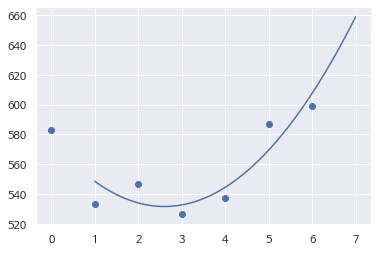

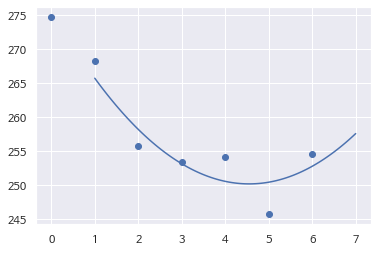

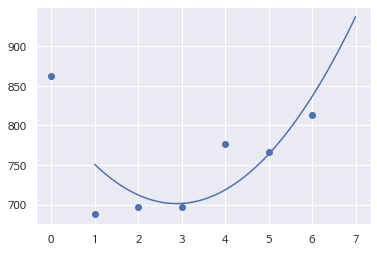

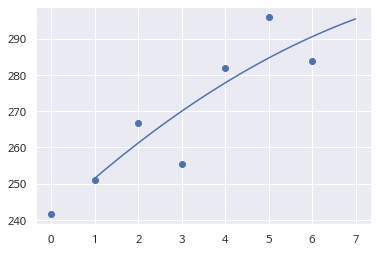

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


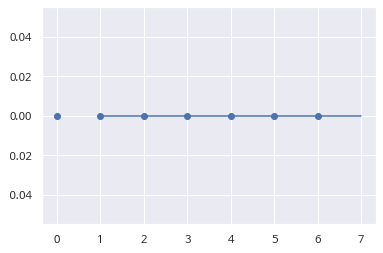

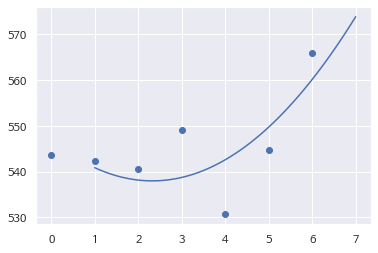

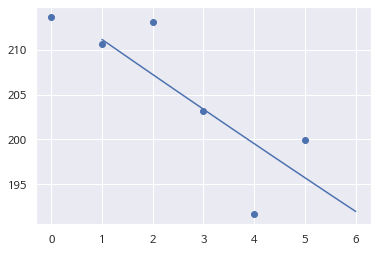

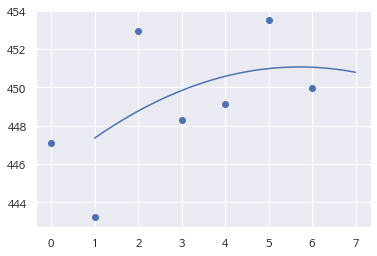

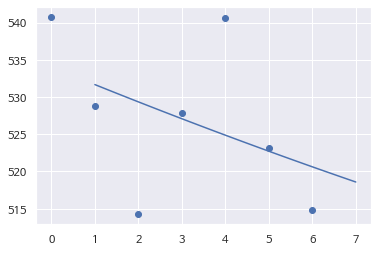

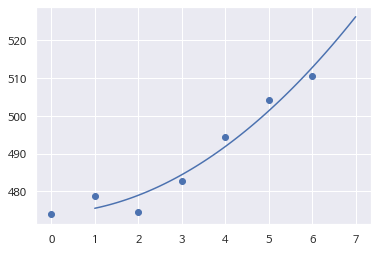

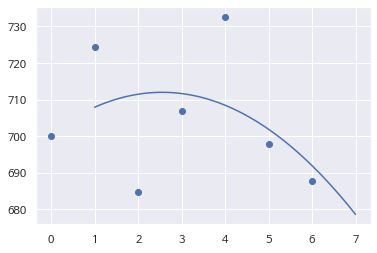

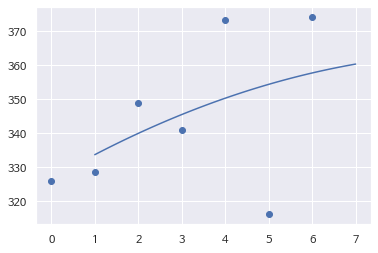

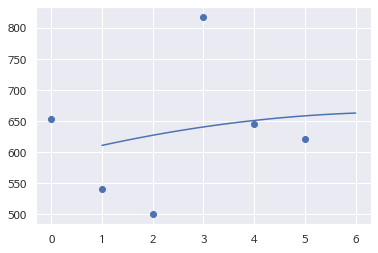

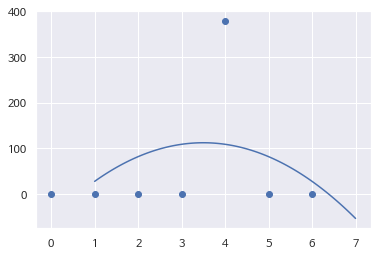

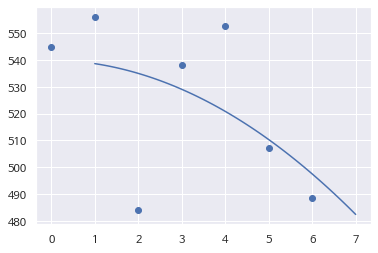

In [ ]:
target = '내부CO2'
Sampling_number = 15
for i in random.sample(list(train_input.Sample_no.unique()),Sampling_number):
  train_input.loc[train_input['Sample_no'] == i, target]
  plt.scatter(range(len(train_input.loc[train_input['Sample_no'] == i, target])), train_input.loc[train_input['Sample_no'] == i, target])
  mymodel = np.poly1d(np.polyfit(range(len(train_input.loc[train_input['Sample_no'] == i, target])), train_input.loc[train_input['Sample_no'] == i, target], 2))
  myline = np.linspace(1, len(train_input.loc[train_input['Sample_no'] == i, target]), 100)
  plt.plot(myline, mymodel(myline))
  plt.show()